# Analysis of results from AOMA logged at h5 file

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy import signal
import dataloader as dl
from plot import plotModeShape
import os
from trace import ModeTrace

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
loader = dl.HDF5_result_loader(path=os.getcwd()+'/../../output/logs/output_AOMA_hangers.h5')

({'avg': 22.053938356164384, 'std': 2.2109630881183784, 'max': 32, 'min': 11}, <Figure size 1800x1200 with 1 Axes>)


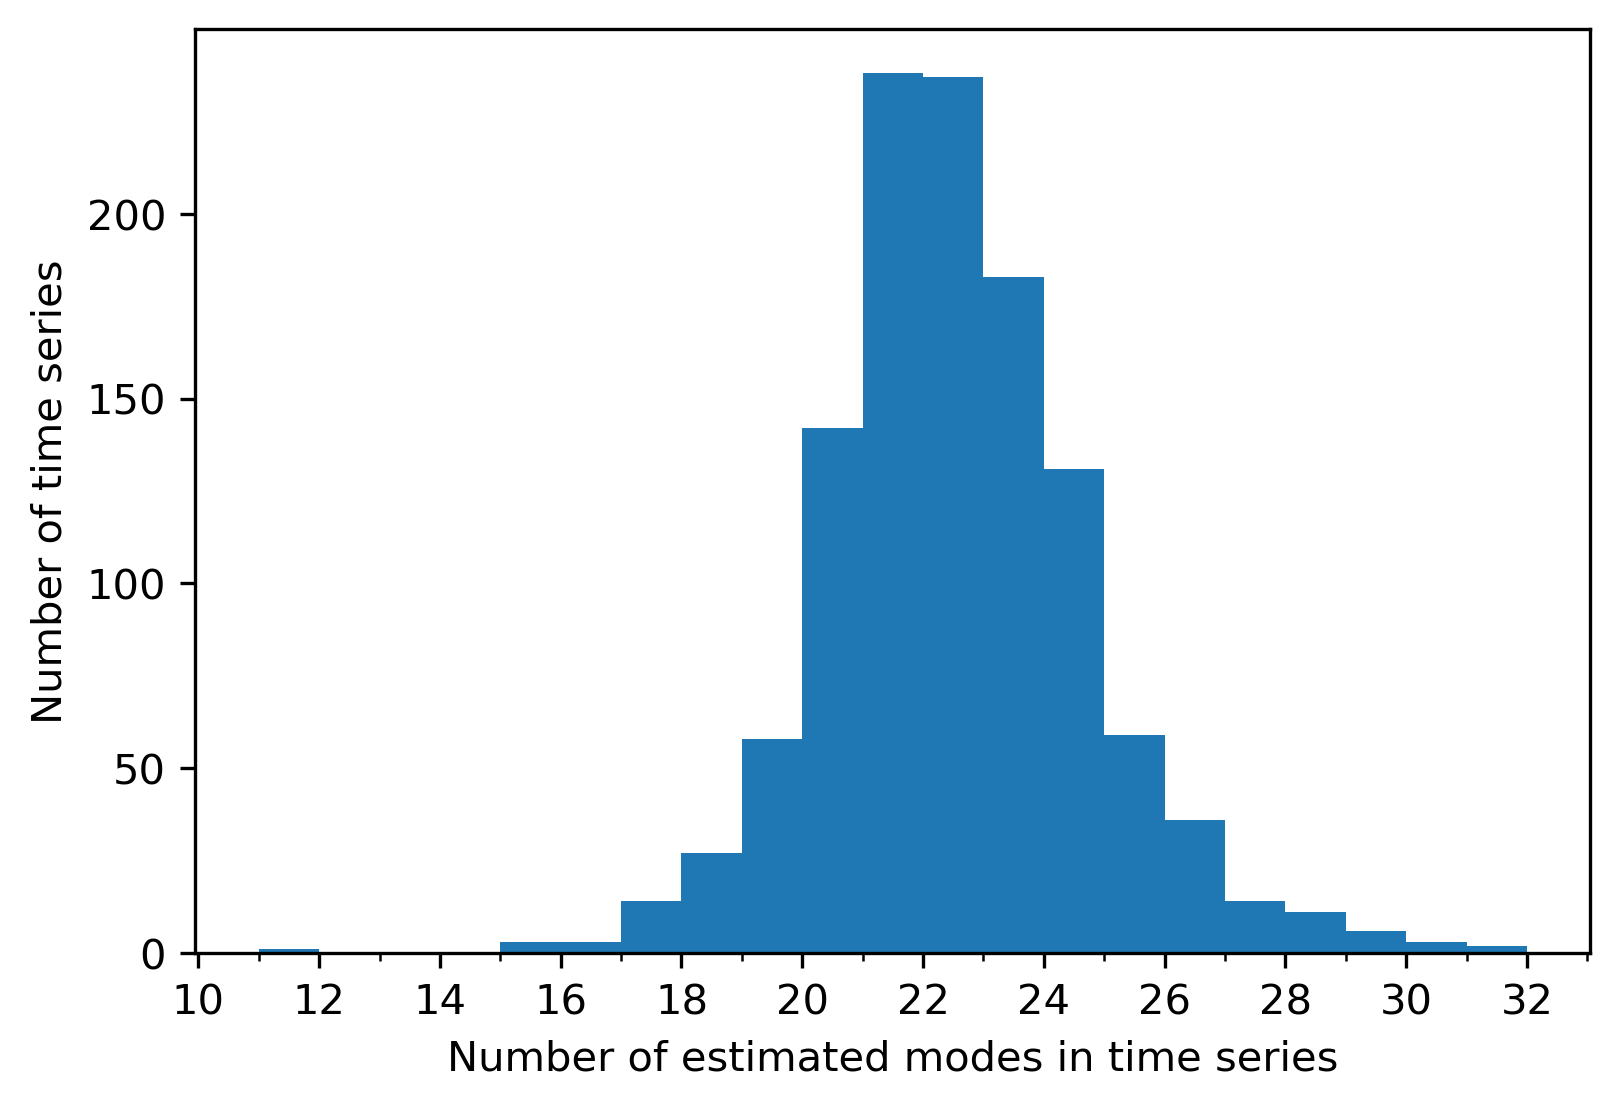

In [5]:
all_modes = np.array(loader.get_modes_all_periods(), dtype='object')
temps, mean_wind_speed, max_wind_speed, mean_wind_direction, execution_time = loader.get_statistics()
print(loader.get_detection_statistics())
plt.savefig(os.getcwd()+'/../../output/plots/number_histogram.jpg')

In [4]:
freqs = []
damping = []
num = []
#temps = []
mean_wind = []
max_wind = []
execution_time = []
high_freqs = []
low_mode_damping = []

counter = 0
for period in loader.periods:
    counter += 1
    frequencies = np.array(loader.hdf5_file[period]['Frequencies'])
    damp = np.array(loader.hdf5_file[period]['Damping'])
    freqs.extend(frequencies)
    damping.extend(damp)
    mean_wind.append(loader.hdf5_file[period].attrs['Mean wind speed'])
    max_wind.append(loader.hdf5_file[period].attrs['Max wind speed'])
    #temps.append(loader.hdf5_file[period].attrs['Mean temp'])
    execution_time.append(loader.hdf5_file[period].attrs['Execution time'])
    num.extend(np.ones_like(frequencies)*counter)

    #pick element from frequencies with value closest to 0.8 Hz
    high_freqs.append(min(list(frequencies), key=lambda x:abs(x-0.8)))

    #pick element from damping from a low frequency mode
    low_mode_damping.append(damp[2])

In [5]:
print(counter)

1168


## FEM results

In [6]:
#Load FEM results to use as a bench mark
FEM_loader = dl.FEM_result_loader(path=os.getcwd()+ '/../../../FEM/HalogalandModel_exportmodal.h5')

FEM_modes = FEM_loader.get_all_modes()
f= FEM_loader.f
phis_FEM = FEM_loader.phi

In [7]:
print(len(f))

24


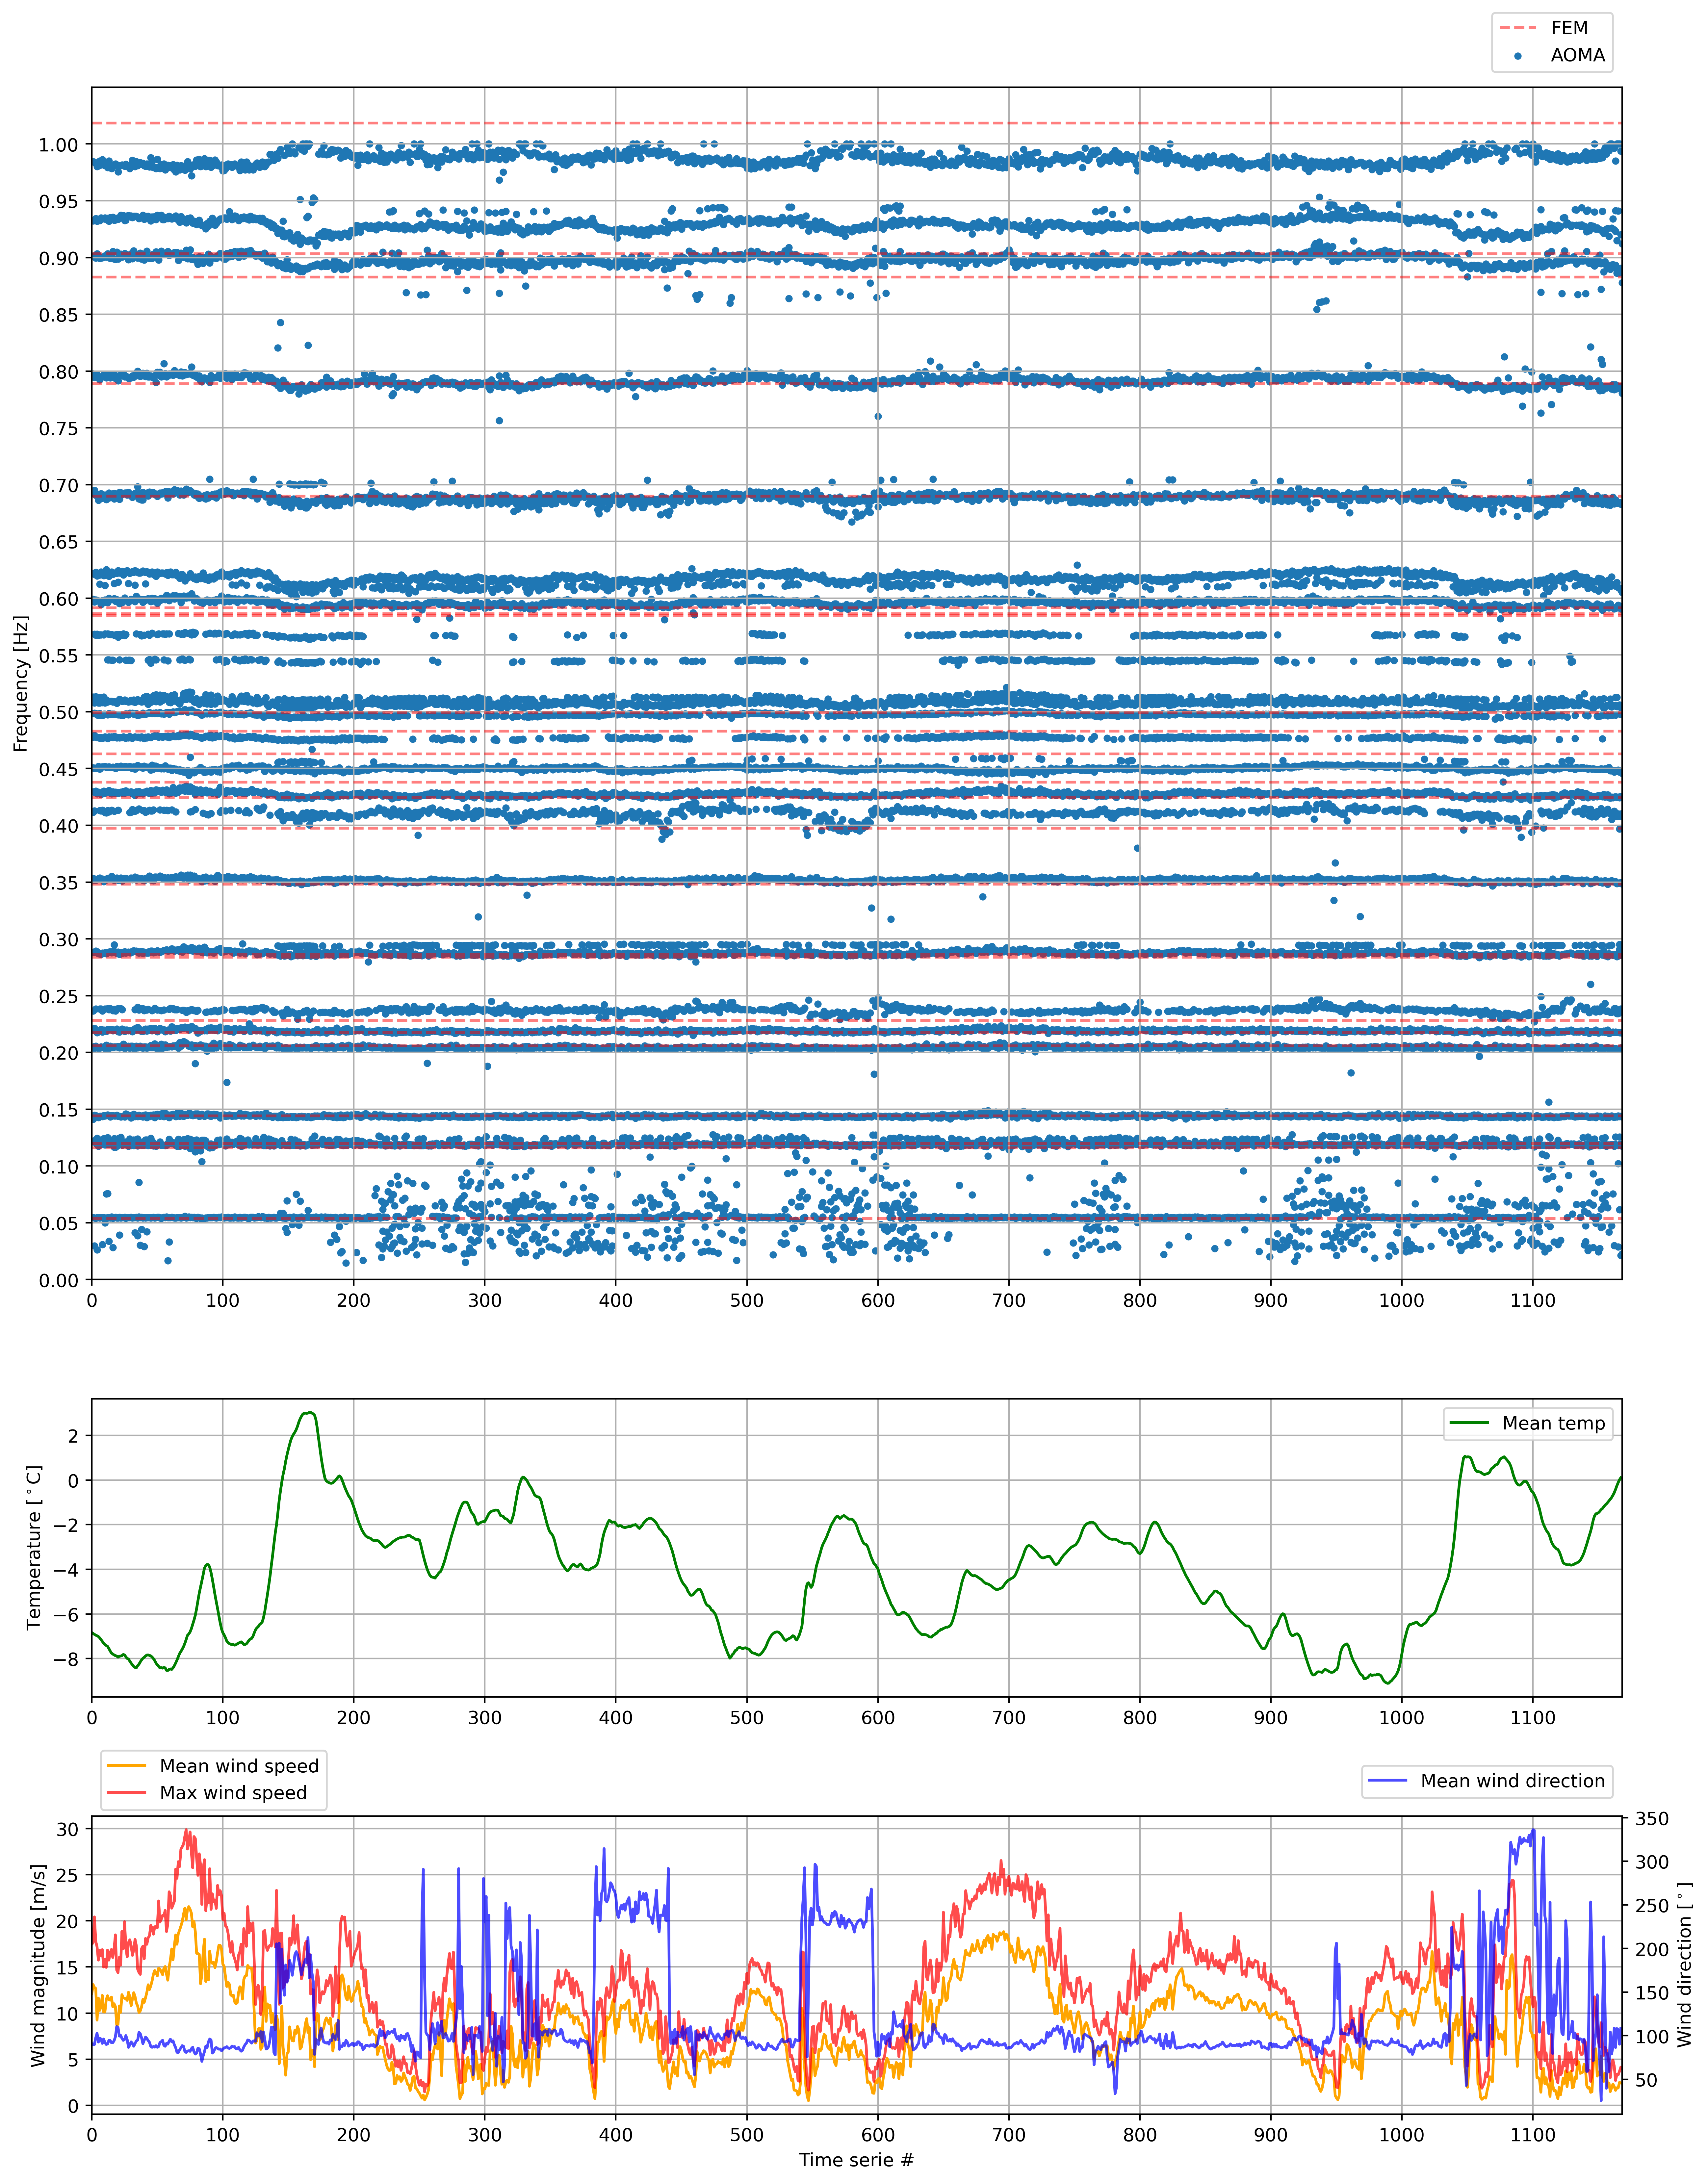

In [8]:
fig, (a1, a2, a3) = plt.subplots(3,1, figsize=(15, 20), dpi=400, gridspec_kw={'height_ratios': [8, 2, 2]})

a1.axhline(y = f[0], color='r', linestyle = '--', alpha = 0.5, label = 'FEM')
for i in range(len(f)-1):
    a1.axhline(y = f[i+1], color='r', linestyle = '--', alpha = 0.5)


a1.scatter(np.array(num), np.array(freqs), marker='.', label = 'AOMA')

a1.set_ylim((0,1.05))
a1.set_xlim((0, len(mean_wind)))
a1.set_ylabel('Frequency [Hz]')
a1.set_xticks(np.arange(0, len(mean_wind), step=100))
a1.set_yticks(np.arange(0, 1.05, step=0.05))
a1.legend(loc = 'upper right', bbox_to_anchor=(1, 1.07))
plt.xlabel('Time serie #')
a1.grid()

#
#a2.plot(np.arange(0, len(execution_time)), np.array(execution_time), label = 'Execution time')
a3.plot(np.arange(0, len(mean_wind_speed)), np.array(mean_wind_speed), label = 'Mean wind speed', color='orange')
a3.plot(np.arange(0, len(mean_wind_speed)), np.array(max_wind_speed), label = 'Max wind speed', color='red', alpha=0.7)
a3.set_xlim((0, len(mean_wind)))
a3.set_ylabel('Wind magnitude [m/s]')
a3.set_xticks(np.arange(0, len(mean_wind), step=100))
a3.legend(loc = 'upper left', bbox_to_anchor=(0, 1.25))
a3.grid()

a4 = a3.twinx()
a4.plot(np.arange(0, len(mean_wind_direction)), np.array(mean_wind_direction), label = 'Mean wind direction', color='blue', alpha=0.7)
a4.set_ylabel('Wind direction [$^\circ$]')
a4.legend(loc = 'upper right', bbox_to_anchor=(1, 1.2))


a2.plot(np.arange(0, len(temps)), np.array(temps), label = 'Mean temp', color='green')
a2.set_ylabel('Temperature [$^\circ$C]')
a2.set_xlim((0, len(mean_wind)))
a2.set_xticks(np.arange(0, len(mean_wind), step=100))
a2.legend(loc = 'upper right')
a2.grid()
plt.savefig(os.getcwd()+'/../../output/plots/freq_vs_time_environmental.jpg')
plt.show()

In [9]:
tracer = ModeTrace(FEM_modes, len(all_modes))
tracer.add_all_modes(all_modes)

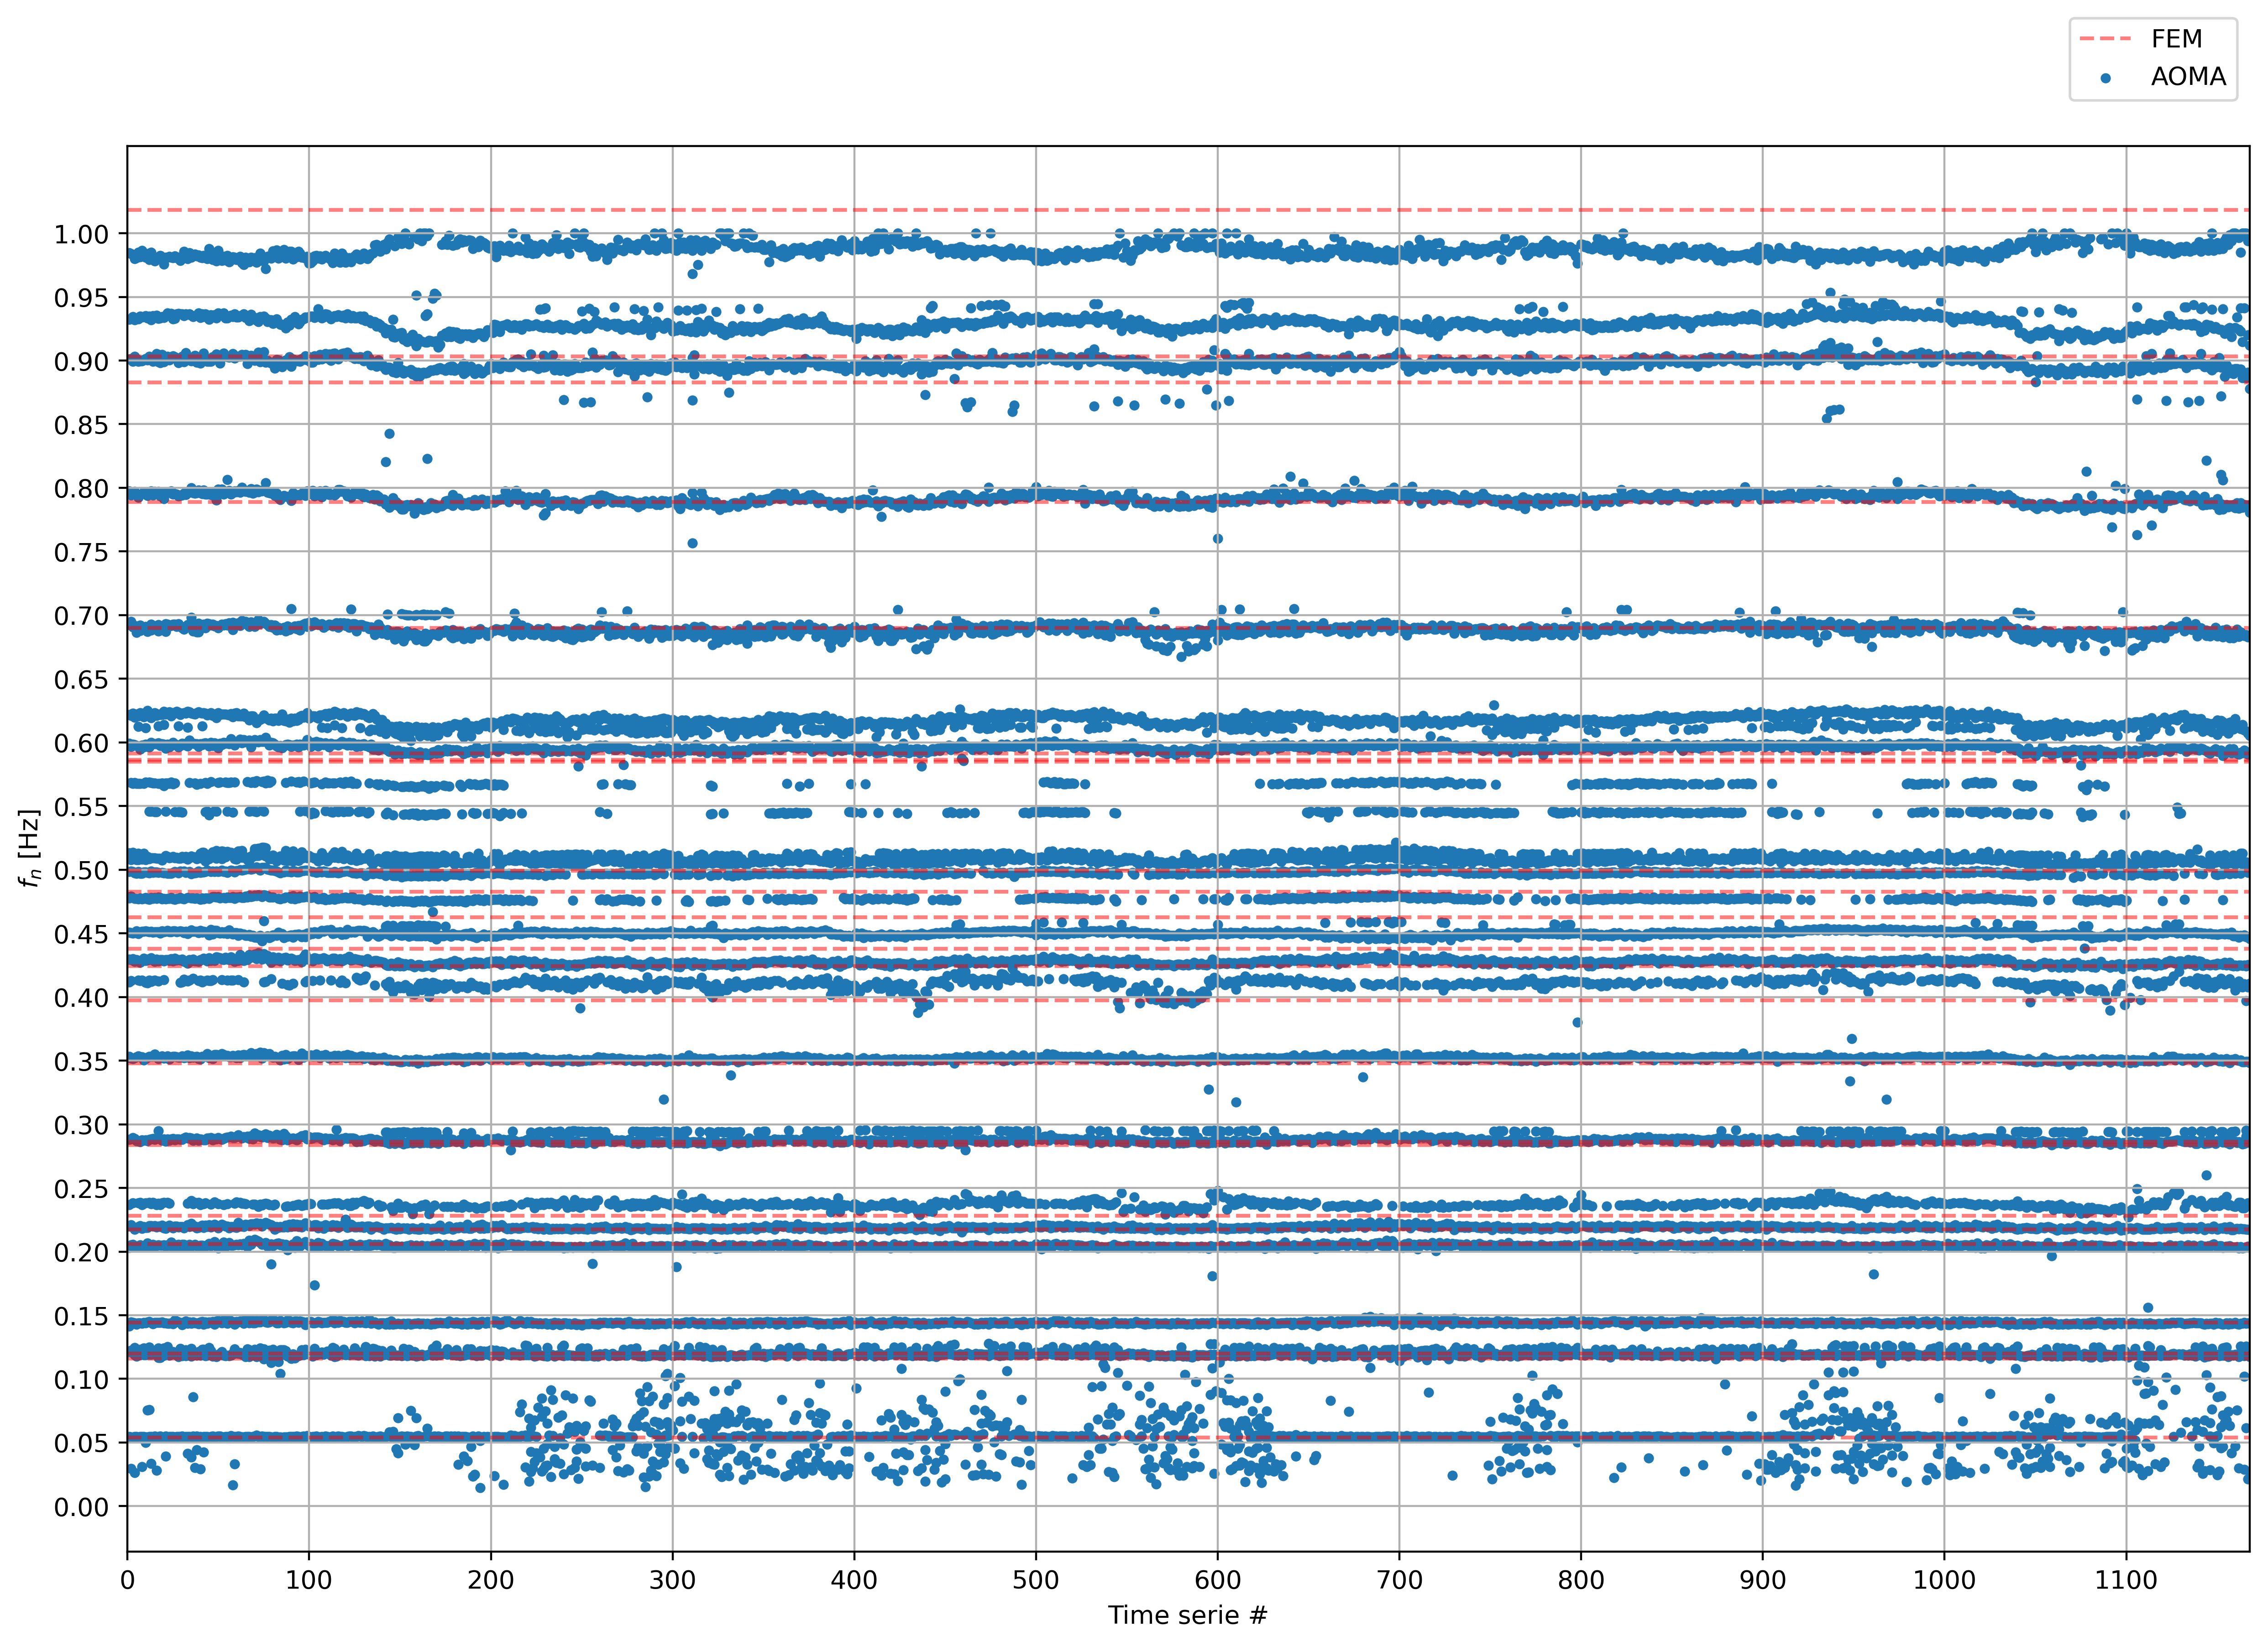

Total number of detected modes: 25759


In [10]:
plt.figure(figsize=(15, 10), dpi=400)

plt.axhline(y = f[0], color='r', linestyle = '--', alpha = 0.5, label = 'FEM')
for i in range(len(f)-1):
    plt.axhline(y = f[i+1], color='r', linestyle = '--', alpha = 0.5)

plt.scatter(np.array(num), np.array(freqs), marker='.', label = 'AOMA')

plt.xlim([0, len(tracer.mode_trace[0,:])])
plt.xticks(np.arange(0, len(mean_wind), step=100))
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1.1))
plt.xlabel('Time serie #')
plt.ylabel('$f_n$ [Hz]')
plt.grid()
plt.savefig(os.getcwd()+'/../../output/plots/freq_vs_time_all.jpg')
plt.show()

print('Total number of detected modes: ' + str(len(freqs)))


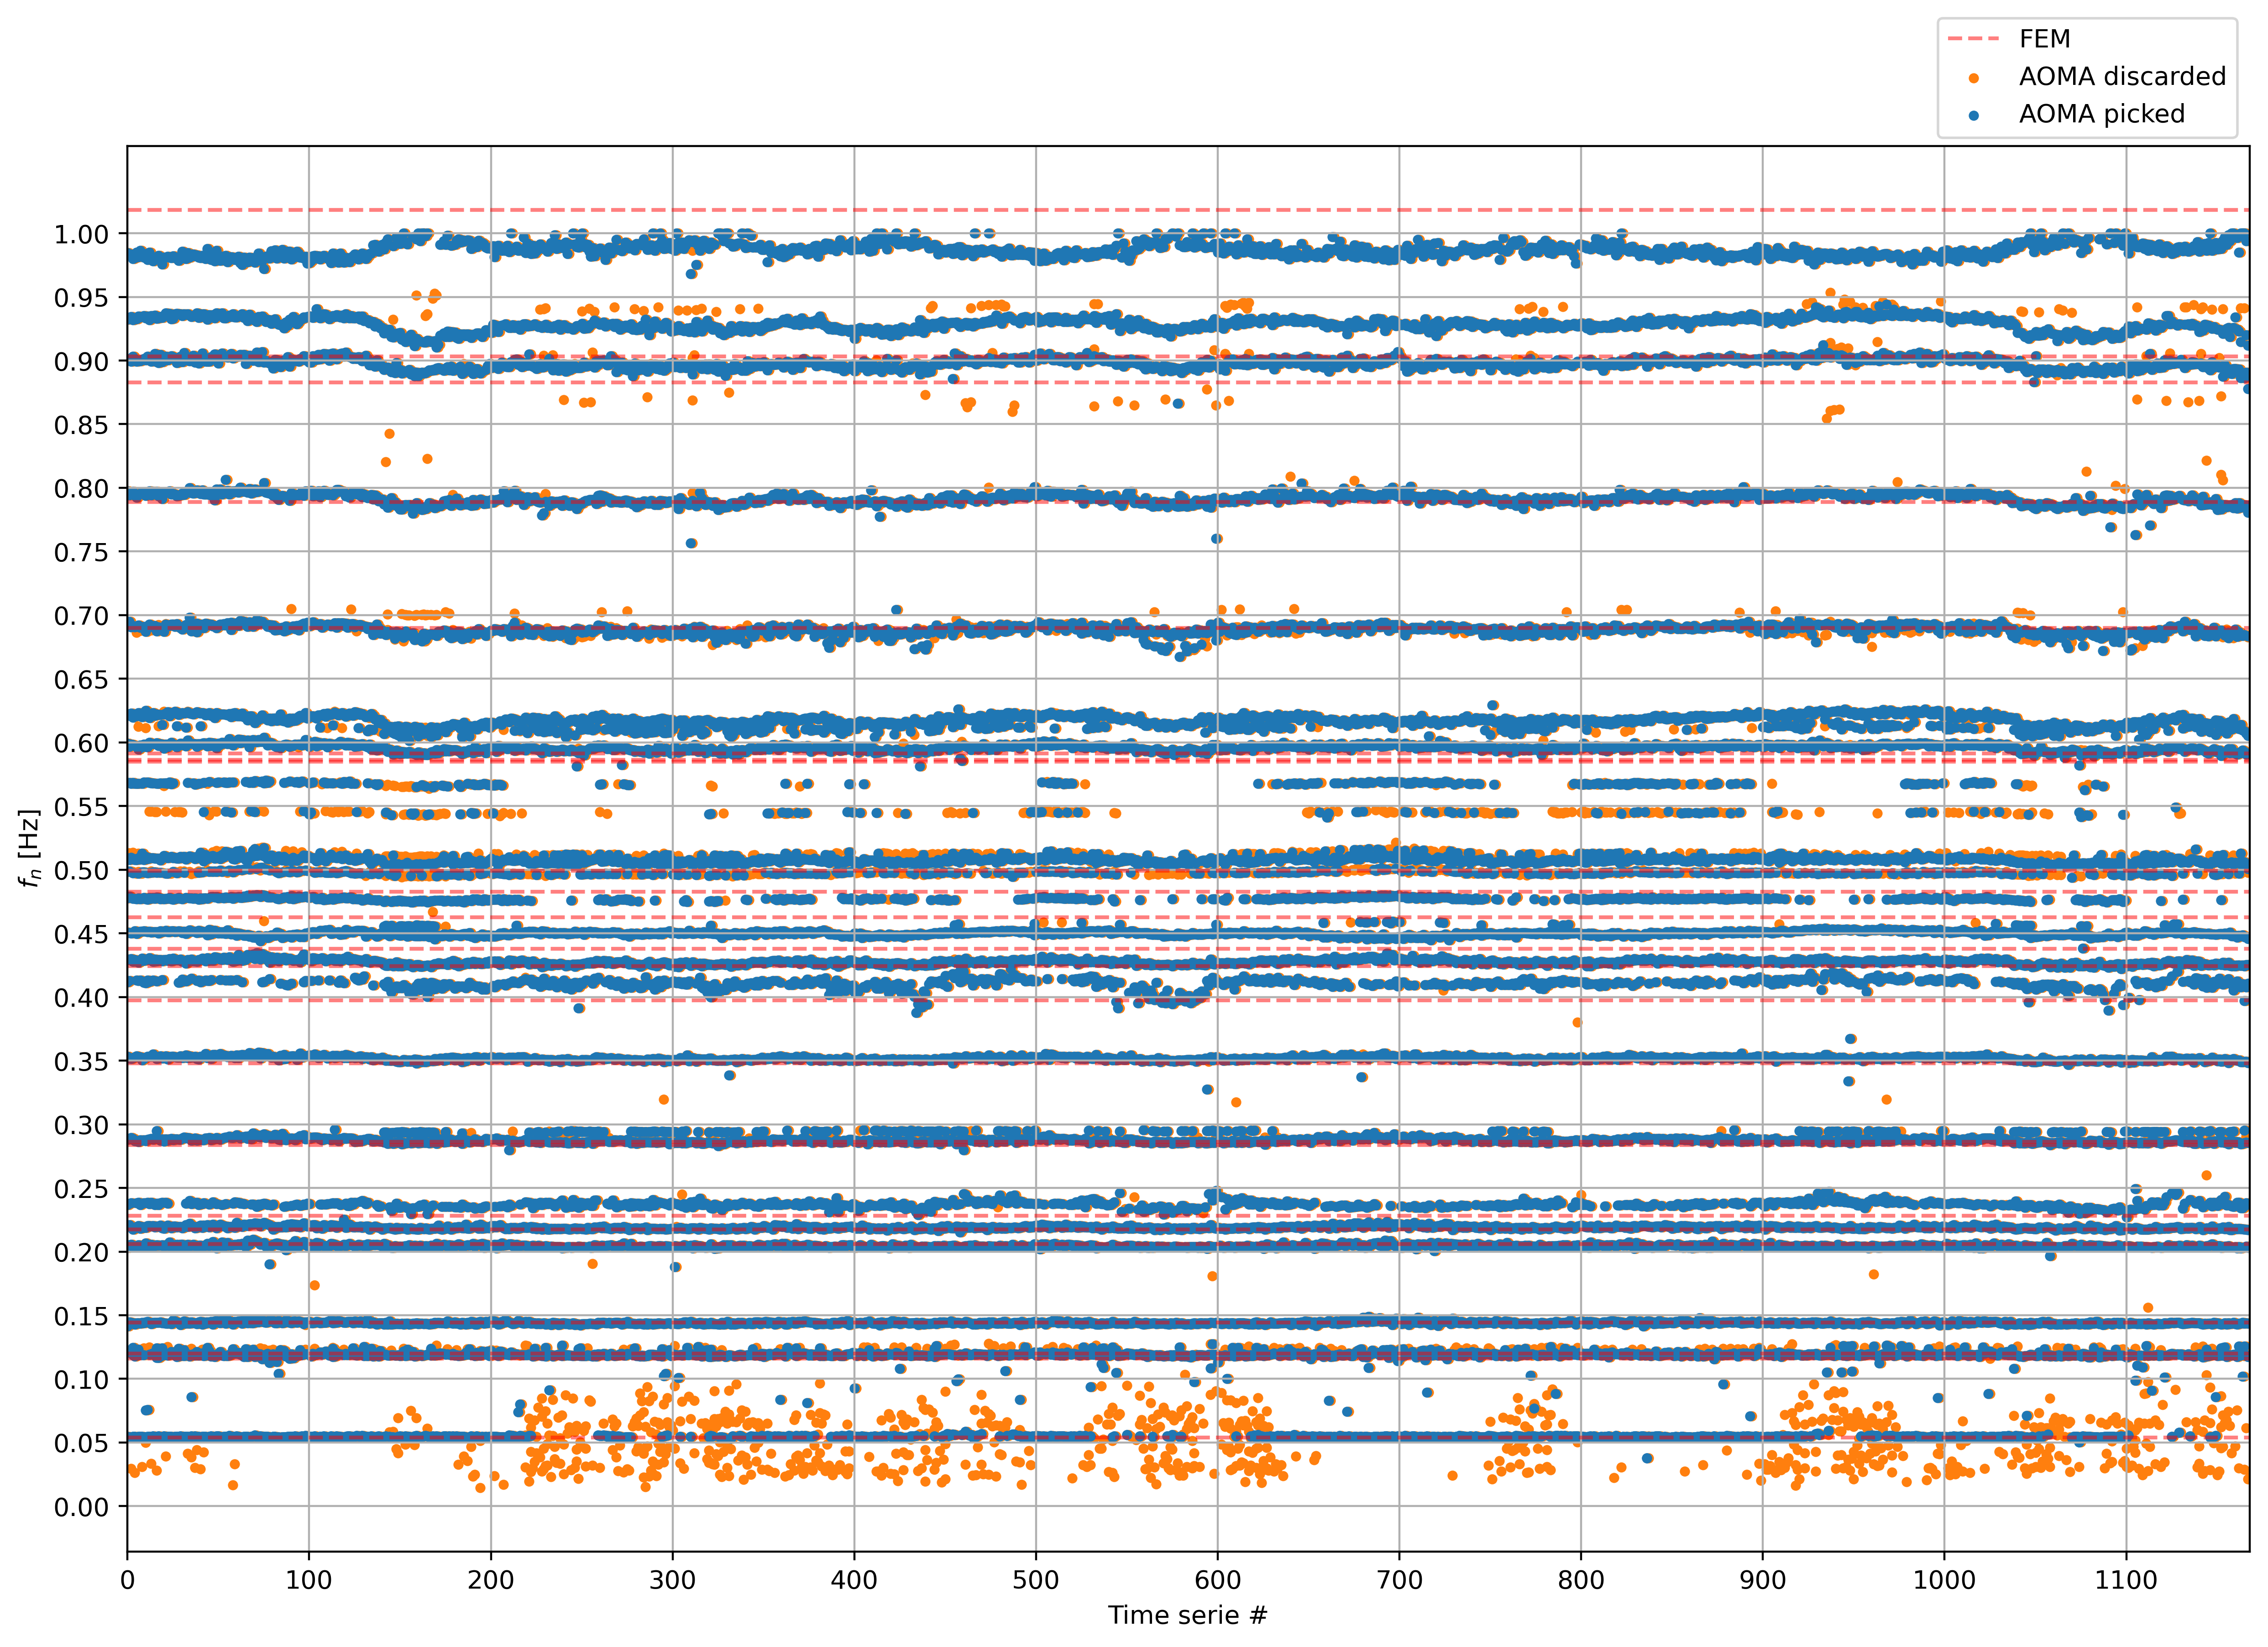

Number of matched modes: 23218
Number of unmatched modes: 2541


In [11]:
plt.figure(figsize=(15, 10), dpi=400)

plt.axhline(y = f[0], color='r', linestyle = '--', alpha = 0.5, label = 'FEM')
for i in range(len(f)-1):
    plt.axhline(y = f[i+1], color='r', linestyle = '--', alpha = 0.5)

plt.scatter(np.array(num), np.array(freqs), marker='.', color='tab:orange', label = 'AOMA discarded')

freq = tracer.get_frequencies_from_trace(0)
indexes = np.array(list(zip(*freq))[0])
freqs_mode = np.array(list(zip(*freq))[1])
plt.scatter(np.array(indexes), np.array(freqs_mode), marker='.', color='tab:blue', label='AOMA picked')

matched = 0
for i in range(len(f)):
    freq = tracer.get_frequencies_from_trace(i)
    indexes = np.array(list(zip(*freq))[0])
    freqs_mode = np.array(list(zip(*freq))[1])
    plt.scatter(np.array(indexes), np.array(freqs_mode), marker='.', color='tab:blue')
    matched += len(freqs_mode)


plt.xlim([0, len(tracer.mode_trace[0,:])])
plt.xticks(np.arange(0, len(mean_wind), step=100))
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1.1))
plt.xlabel('Time serie #')
plt.ylabel('$f_n$ [Hz]')
plt.grid()
plt.savefig(os.getcwd()+'/../../output/plots/freq_vs_time_picked.jpg')
plt.show()

print('Number of matched modes: ' +str(matched))
print('Number of unmatched modes: ' +str(len(freqs)-matched))

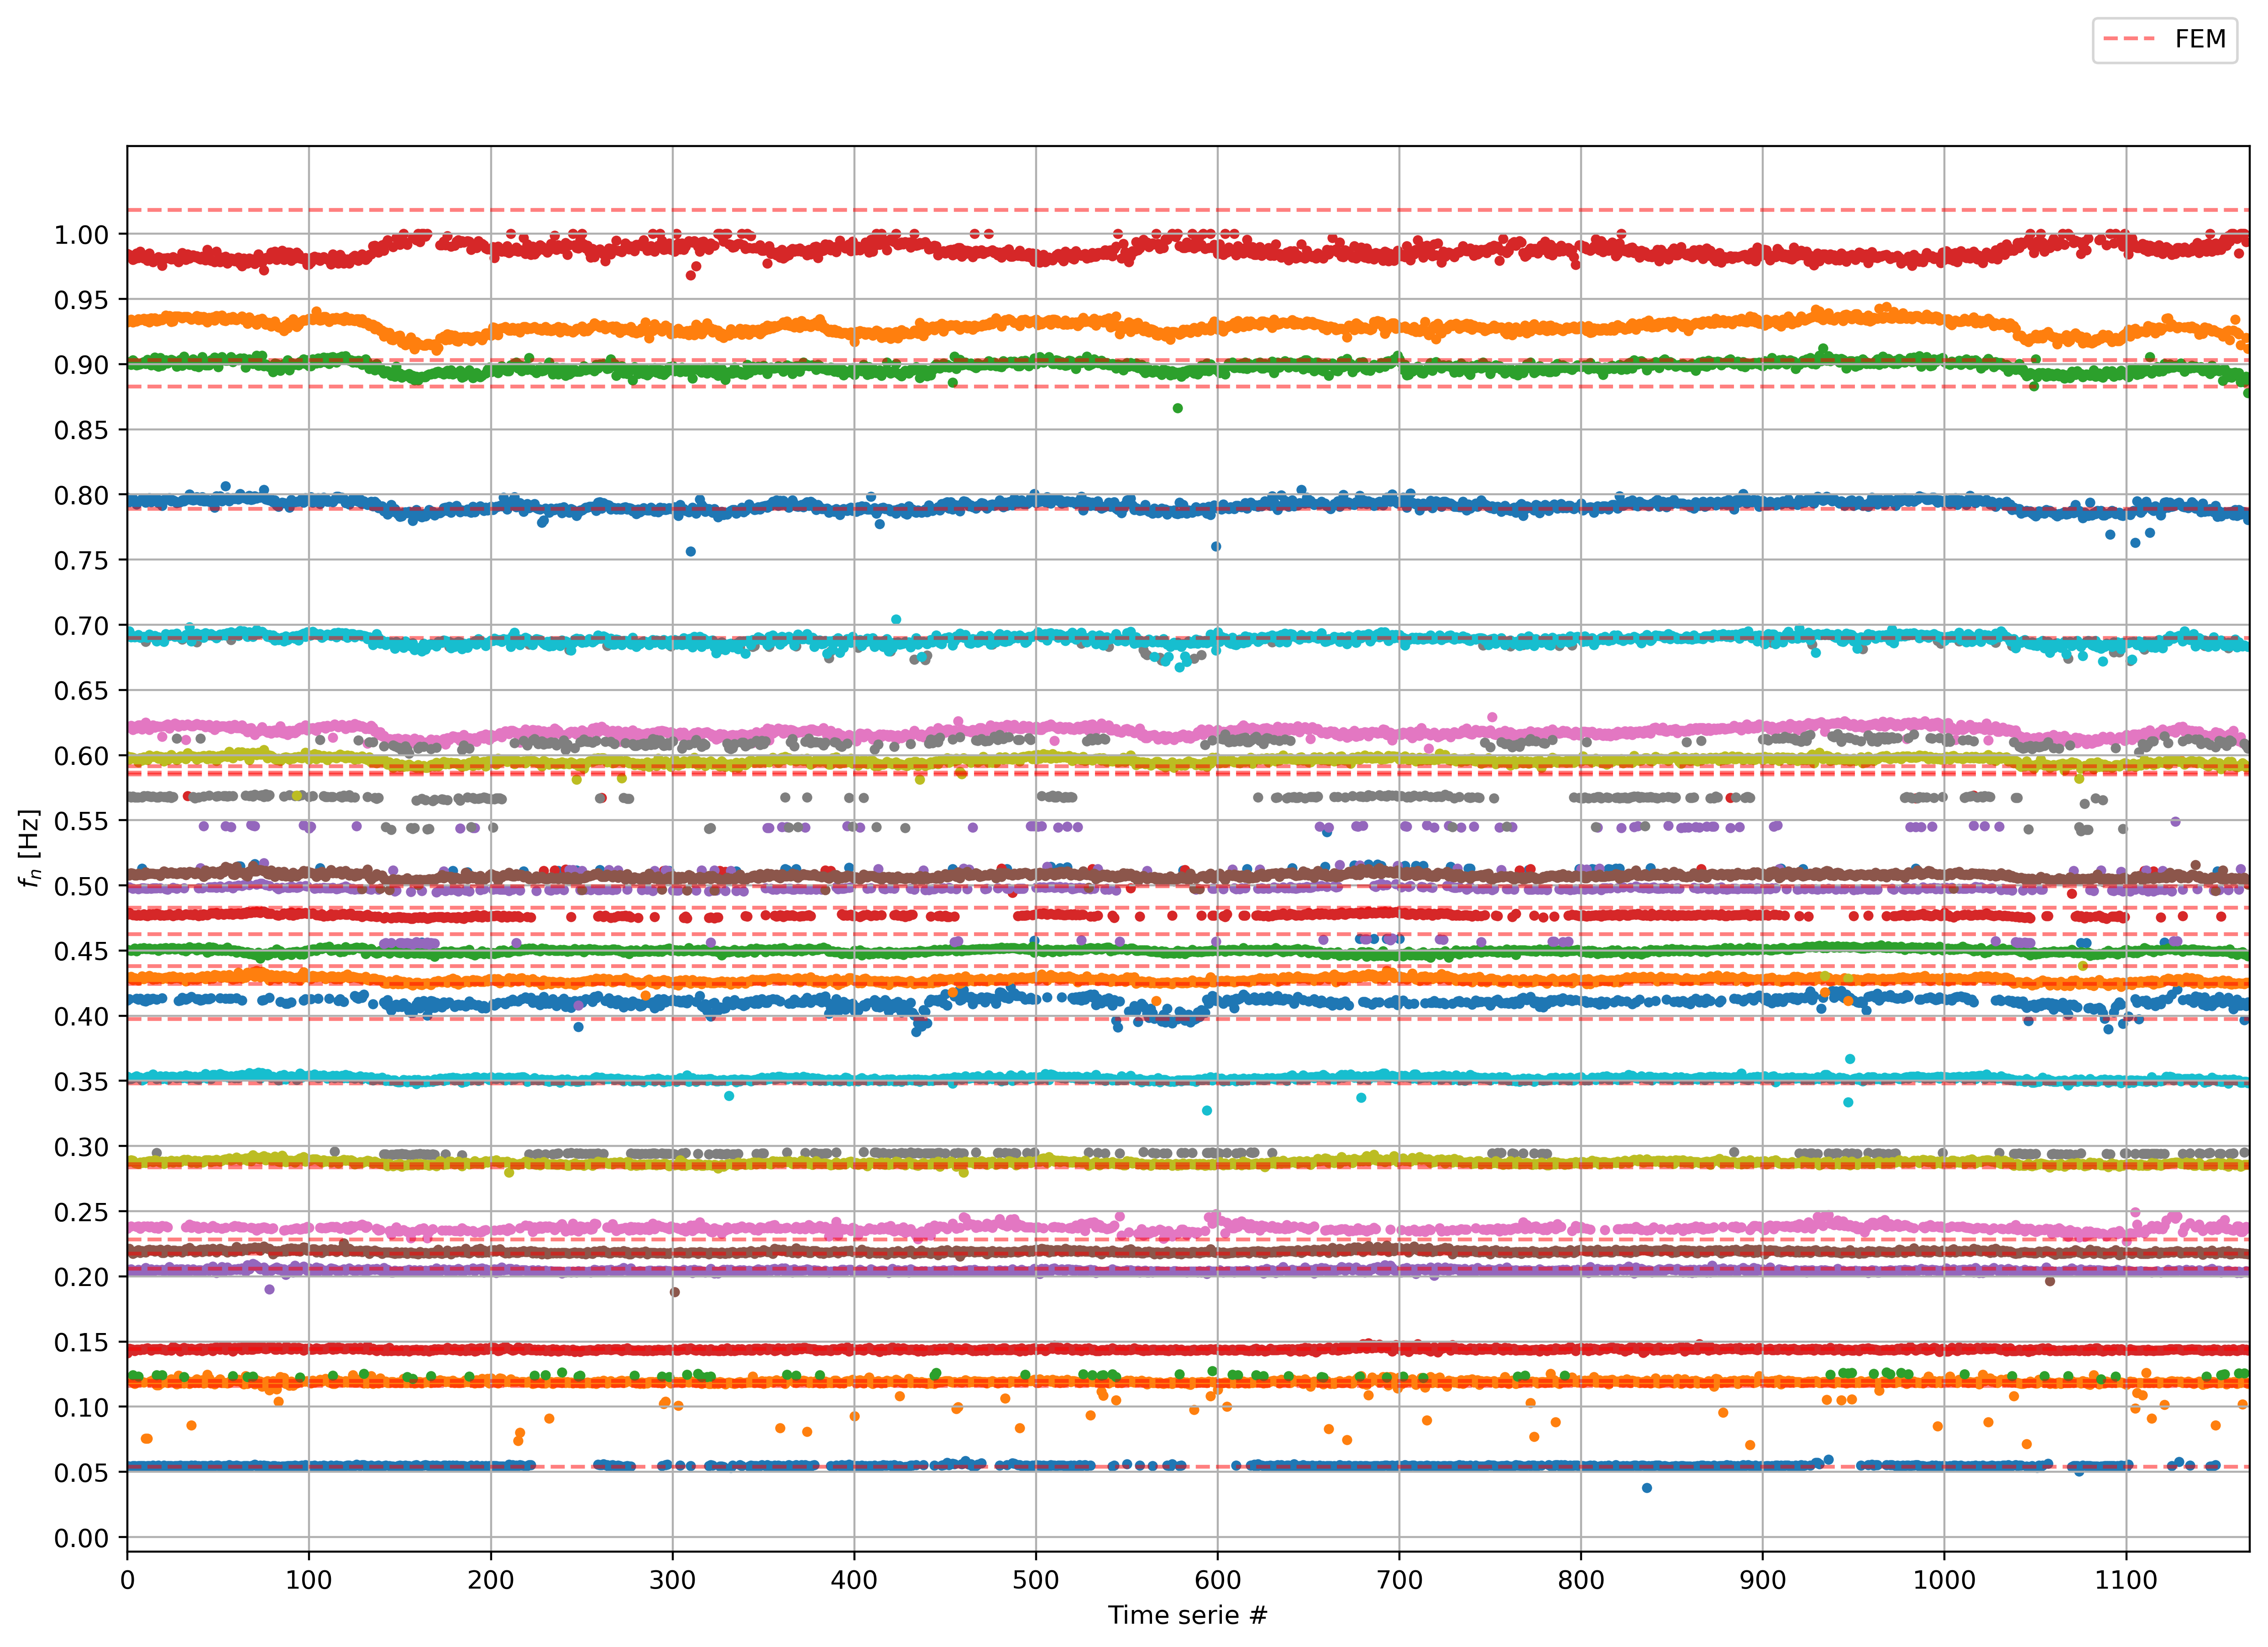

In [12]:
plt.figure(figsize=(15, 10), dpi=400)

plt.axhline(y = f[0], color='r', linestyle = '--', alpha = 0.5, label = 'FEM')
for i in range(len(f)-1):
    plt.axhline(y = f[i+1], color='r', linestyle = '--', alpha = 0.5)


for i in range(len(f)):
    freq = tracer.get_frequencies_from_trace(i)
    indexes = np.array(list(zip(*freq))[0])
    freqs_mode = np.array(list(zip(*freq))[1])
    plt.scatter(np.array(indexes), np.array(freqs_mode), marker='.')


plt.xlim([0, len(tracer.mode_trace[0,:])])
plt.xticks(np.arange(0, len(mean_wind), step=100))
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.legend(loc = 'upper right', bbox_to_anchor=(1, 1.1))
plt.xlabel('Time serie #')
plt.ylabel('$f_n$ [Hz]')
plt.grid()
plt.savefig(os.getcwd()+'/../../output/plots/freq_vs_time_sorted.jpg')
plt.show()